In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
datapath = "../data/ICPSR_04351/DS0002/04351-0002-Data.csv"

dump = pd.read_csv(datapath)


unemployment_datapath = "../data/ECONOMIC/UNRATE.csv"
unemployment = pd.read_csv(unemployment_datapath)

In [3]:
dump = dump[["MONTH","YEAR", "VICSEX", "VICRACE", "OFFSEX", "OFFRACE", "RELATION", "CIRCUM", "POPGROUP", "STCODE"]]

# use date for joining
dump['DATE'] = pd.to_datetime(dump[['YEAR', 'MONTH']].assign(DAY=1)).dt.date 

dump["DATE_and_STATE"] = dump["DATE"].astype(str) + "_" + dump["STCODE"].astype(str)

dump["COUNT"] = 1

dump["IN_FAMILY"] = dump["RELATION"].apply(lambda x: 1 if 1 <= 1 and x <= 16 else 0)
dump["KILLED_CHILD"] = dump["RELATION"].apply(lambda x: 1 if x in [7,8] else 0)
dump["IN_CITY"] = dump["POPGROUP"].apply(lambda x: 1 if x in [1, 2, 10, 11, 12, 13, 20] else 0)
dump["IN_SUBURB"] = dump["POPGROUP"].apply(lambda x: 1 if x in [3, 4, 5, 30, 40, 50] else 0)
dump["IN_RURAL"] = dump["POPGROUP"].apply(lambda x: 1 if x not in [1, 2, 10, 11, 12, 13, 20, 3, 4, 5, 30, 40, 50] else 0)


D_S_PANEL = dump.groupby("DATE_and_STATE")[["COUNT","IN_FAMILY", "KILLED_CHILD", "IN_CITY", "IN_SUBURB", "IN_RURAL"]].sum()


(array([10166., 20039.,  2499.,  2707.,  3174.,  3752.,  7828.,  5716.,
         4880.,  1057.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

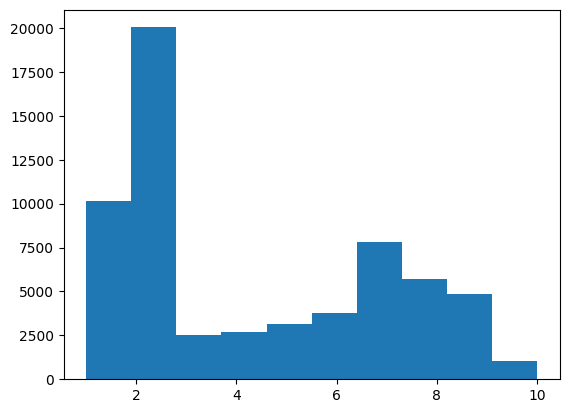

In [4]:
Medallion = dump.copy(True)


Medallion["Married"] = Medallion["RELATION"].apply(lambda x: 1 if x in [1,2,3,4] else 0)
Medallion["Parent"] = Medallion["RELATION"].apply(lambda x: 1 if x in [5,6] else 0)
Medallion["Child"] = Medallion["RELATION"].apply(lambda x: 1 if x in [7,8] else 0)
Medallion["Sibling"] = Medallion["RELATION"].apply(lambda x: 1 if x in [9,10] else 0)
Medallion["Other"] = Medallion["RELATION"].apply(lambda x: 1 if x in [16] else 0)

relations = Medallion.groupby("RELATION").count()["COUNT"]

plt.hist(Medallion[Medallion["RELATION"] <= 10 ]["RELATION"], 10)

(array([   0., 3554., 1989., 1379., 1041., 2282.,  966.,  701.,  679.,
         600.,  425.,  305.,  771.,  958.,  563.,  423.,  291.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   8.,  10.,  12.,  15.,  20.,
         25.,  30.,  50.,  75., 100., 150., 200.]),
 <BarContainer object of 17 artists>)

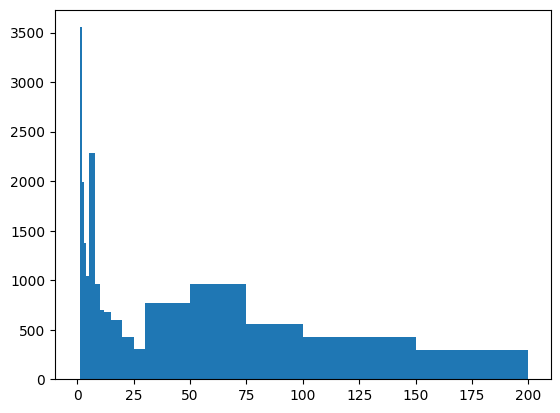

In [15]:
# new granuality of data
ts = dump.groupby(["DATE", "IN_FAMILY", "KILLED_CHILD", "IN_CITY", "OFFRACE", "OFFSEX", "IN_RURAL"]).sum()
ts

plt.hist(ts['COUNT'], bins=[0,1,2,3,4,5,8,10,12,15,20,25,30,50,75,100,150, 200])


In [6]:
unemployment.index = pd.to_datetime(unemployment['DATE']).dt.date

unemployment.drop(columns=["DATE"], inplace=True)

In [7]:
ts = ts.join(unemployment, how="left")

ts.dropna(inplace=True)

In [10]:
x = np.log(ts["UNRATE"])

x = sm.add_constant(x)

y = np.log(ts["IN_FAMILY"])

sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              IN_FAMILY   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     344.2
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           2.58e-53
Time:                        12:03:43   Log-Likelihood:                 105.20
No. Observations:                 336   AIC:                            -206.4
Df Residuals:                     334   BIC:                            -198.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9149      0.080     48.716      0.000       3.757       4.073
UNRATE         0.8122      0.044     18.553      0.000       0.726       0.898
==============================================================================
Omnibus:                        0.790   Durbin-Watson:                   0.472
Prob(Omnibus):                  0.674   Jarque-Bera (JB):                0.905
Skew:                          -0.091   Prob(JB):                        0.636
Kurtosis:                       2.823   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
x = np.log(ts["UNRATE"])

x = sm.add_constant(x)

y = np.log(ts["COUNT"])

sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  COUNT   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     102.4
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           3.64e-21
Time:                        12:03:43   Log-Likelihood:                 129.52
No. Observations:                 336   AIC:                            -255.0
Df Residuals:                     334   BIC:                            -247.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6023      0.075     88.326      0.000       6.455       6.749
UNRATE         0.4120      0.041     10.118      0.000       0.332       0.492
==============================================================================
Omnibus:                       79.682   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.570
Skew:                           0.942   Prob(JB):                     2.23e-73
Kurtosis:                       7.511   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
np.corrcoef(ts["UNRATE"], ts["COUNT"])

array([[1.        , 0.35848749],
       [0.35848749, 1.        ]])

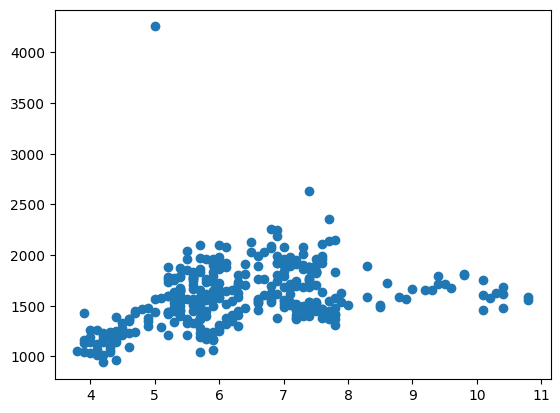

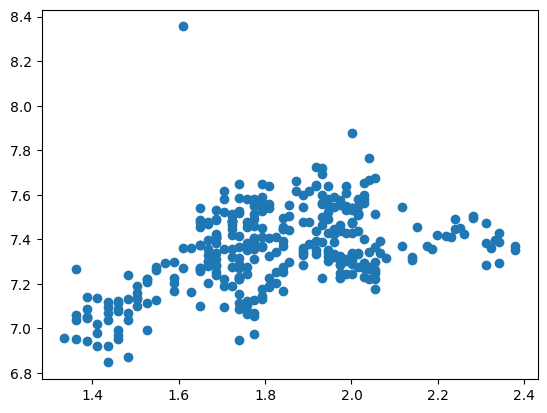

In [13]:
plt.scatter(ts["UNRATE"], ts["COUNT"])
plt.show()

plt.scatter(np.log(ts["UNRATE"]), np.log(ts["COUNT"]))
plt.show()

In [23]:
print(np.corrcoef(ts[["IN_CITY", "IN_SUBURB", "IN_RURAL"]].T))

print(np.corrcoef(ts[["COUNT","IN_FAMILY","KILLED_CHILD"]].T))

print(np.corrcoef(ts[['UNRATE', 'COUNT', "IN_FAMILY"]].T))

[[1.         0.60447955 0.54965804]
 [0.60447955 1.         0.79404433]
 [0.54965804 0.79404433 1.        ]]
[[1.         0.48015555 0.2716883 ]
 [0.48015555 1.         0.30420704]
 [0.2716883  0.30420704 1.        ]]
[[1.         0.35848749 0.6717302 ]
 [0.35848749 1.         0.48015555]
 [0.6717302  0.48015555 1.        ]]


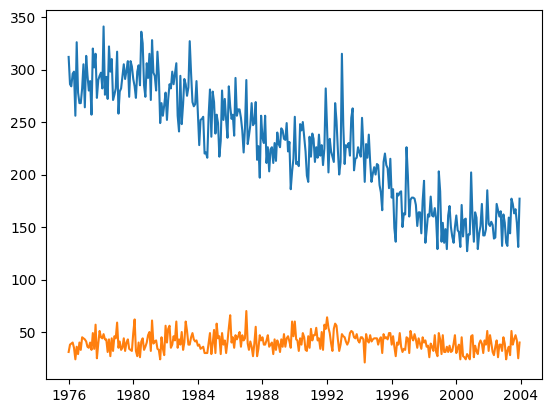

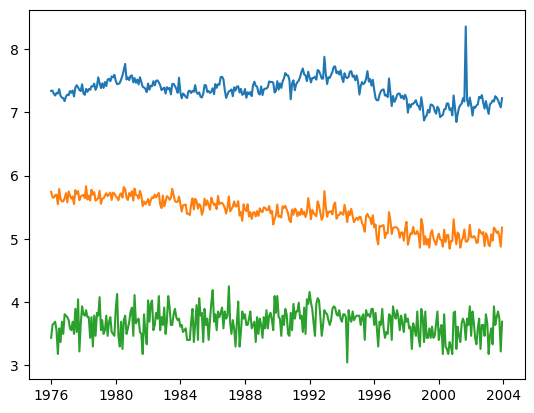

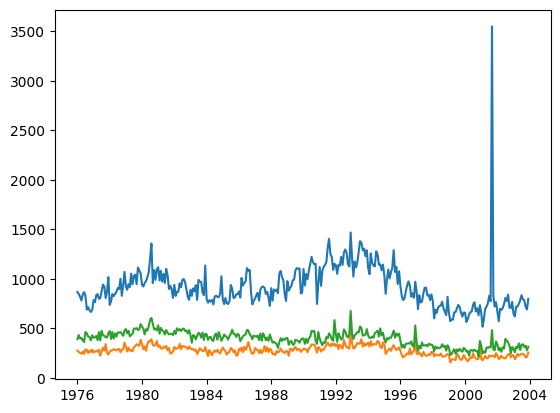

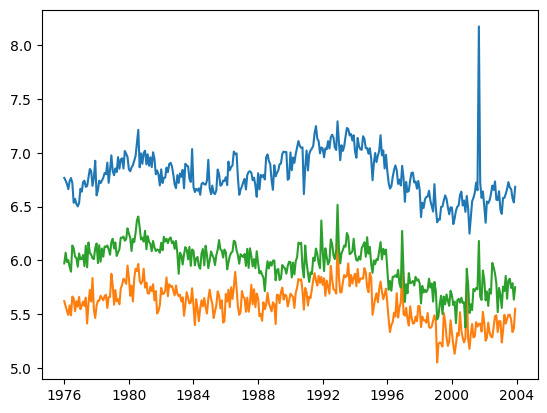

In [14]:
plt.plot(ts["IN_FAMILY"])
plt.plot(ts["KILLED_CHILD"])
plt.show()

plt.plot(np.log(ts["COUNT"]))
plt.plot(np.log(ts["IN_FAMILY"]))
plt.plot(np.log(ts["KILLED_CHILD"]))
plt.show()

plt.plot(ts["IN_CITY"])
plt.plot(ts["IN_SUBURB"])
plt.plot(ts["IN_RURAL"])
plt.show()

plt.plot(np.log(ts["IN_CITY"]))
plt.plot(np.log(ts["IN_SUBURB"]))
plt.plot(np.log(ts["IN_RURAL"]))
plt.show()
